# Time for a Test Drive!

You've spent some time around the Dascar lot, hearing about all the awesome features and specs...enough talk!

Let's jump into a racecar and see what it can do!

## Dask DataFrames

The pandas car...with the Dask engine!

In [5]:
import dask.dataframe as dd

In [2]:
%run ../prep_data.py -d flights

data_dir='/Users/rpelgrim/Documents/git/coiled-resources/dask-tutorial/data'


In [3]:
import os

files = os.path.join('../data', 'nycflights', '*.csv')
files

'../data/nycflights/*.csv'

In [6]:
df = dd.read_csv(files,
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={"TailNum": str,
                        "CRSElapsedTime": float,
                        "Cancelled": bool})

In [8]:
df.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,False,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,False,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,False,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,False,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,False,0


In [9]:
%%time
df.groupby("Origin")["DepDelay"].mean().compute()

CPU times: user 3.3 s, sys: 668 ms, total: 3.97 s
Wall time: 1.84 s


Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64

## Dask Arrays

The Numpy car...with Dask engine superpowers!

In [10]:
import dask.array as da

In [32]:
array = da.random.random((10000, 10000), chunks=(1000, 1000))

In [33]:
array

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [34]:
array[:10,:5]

dask.array<getitem, shape=(10, 5), dtype=float64, chunksize=(10, 5), chunktype=numpy.ndarray>

In [35]:
%%time
array.sum(axis=1).compute()

CPU times: user 613 ms, sys: 109 ms, total: 723 ms
Wall time: 176 ms


array([4990.17647425, 4970.975066  , 4995.89094492, ..., 5034.64012161,
       4959.33729341, 4979.53777384])

## Dask ML

The scikit-learn car with.... you guessed it -- Dask rocketfuel!

In [36]:
from dask_ml.linear_model import LogisticRegression
from dask_ml.datasets import make_classification

In [59]:
X, y = make_classification(n_samples=1_000, chunks=50)

In [60]:
X

dask.array<normal, shape=(1000, 20), dtype=float64, chunksize=(50, 20), chunktype=numpy.ndarray>

In [61]:
y

dask.array<astype, shape=(1000,), dtype=int64, chunksize=(50,), chunktype=numpy.ndarray>

In [62]:
lr = LogisticRegression()

In [63]:
%%time
lr.fit(X, y)

CPU times: user 2.27 s, sys: 571 ms, total: 2.84 s
Wall time: 2.37 s


LogisticRegression()

In [64]:
%%time
lr.predict(X).compute()

CPU times: user 12.8 ms, sys: 1.58 ms, total: 14.4 ms
Wall time: 13 ms


array([ True, False,  True, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
        True, False, False, False, False, False,  True,  True,  True,
        True,  True,  True, False, False,  True, False,  True,  True,
       False, False,  True, False,  True,  True,  True,  True, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
       False,  True, False,  True, False,  True,  True,  True,  True,
       False,  True,  True, False, False,  True,  True,  True,  True,
       False,  True, False,  True,  True, False,  True, False,  True,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False,  True,  True,  True, False,  True, False,
        True,  True,  True, False,  True,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False,  True,  True,
       False,  True,

In [66]:
lr.score(X,y).compute()

0.718

## Custom Dask

In [67]:
from time import sleep

def inc(x):
    """Increments x by one"""
    sleep(1)
    return x + 1

def add(x, y):
    """Adds x and y"""
    sleep(1)
    return x + y

In [68]:
%%time

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 809 µs, sys: 1.31 ms, total: 2.12 ms
Wall time: 3.01 s


In [69]:
from dask import delayed

In [70]:
%%time

a = delayed(inc)(1)
b = delayed(inc)(2)
c = delayed(add)(a, b)

CPU times: user 339 µs, sys: 53 µs, total: 392 µs
Wall time: 363 µs


In [71]:
%%time

c.compute()

CPU times: user 2.08 ms, sys: 1.46 ms, total: 3.54 ms
Wall time: 2.01 s


5

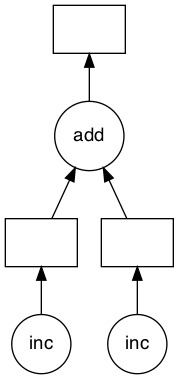

In [72]:
c.visualize()

## Dask on Coiled (cloud cluster)

In [74]:
import coiled

In [78]:
cluster = coiled.Cluster(
    name="dask-tutorial", 
    n_workers=20, 
    software="ncclementi/dask-mini-tutorial",
    scheduler_options={'idle_timeout':'2hrs'},
    shutdown_on_close=False,
)

Output()

Found software environment build
Created FW rules: coiled-dask-rrpelgr71-64142-firewall
Created scheduler VM: coiled-dask-rrpelgr71-64142-scheduler (type: t3.medium, ip: ['100.25.255.227'])


ValueError: Cluster status is unexpectedly STOPPED: it was either unable to start up or died very quickly.

In [76]:
from distributed import Client

client = Client(cluster)
client

/Users/rpelgrim/mambaforge/envs/dask-mini-tutorial/lib/python3.9/site-packages/distributed/client.py:1105: VersionMismatchWarning: Mismatched versions found

+---------+--------+-----------+---------+
| Package | client | scheduler | workers |
+---------+--------+-----------+---------+
| numpy   | 1.21.3 | 1.21.2    | 1.21.2  |
| pandas  | 1.3.4  | 1.3.3     | 1.3.3   |
+---------+--------+-----------+---------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


<Client: 'tls://10.4.5.145:8786' processes=0 threads=0, memory=0 B>

In [77]:
df = dd.read_csv(
    "s3://nyc-tlc/trip data/yellow_tripdata_2019-*.csv",
    parse_dates=["tpep_pickup_datetime", "tpep_dropoff_datetime"],
    dtype={
        "payment_type": "UInt8",
        "VendorID": "UInt8",
        "passenger_count": "UInt8",
        "RatecodeID": "UInt8",
        "store_and_fwd_flag": "category",
        "PULocationID": "UInt16",
        "DOLocationID": "UInt16",
    },
    storage_options={"anon": True},
    blocksize="16 MiB",
)

AttributeError: module 'aiobotocore' has no attribute 'AioSession'

distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError


In [ ]:
df

In [ ]:
df.groupby("passenger_count").tip_amount.mean().compute()